<a href="https://colab.research.google.com/github/luciabarg/datos_tumoresferas/blob/main/EyCD_Clasif_Tumoresferas_Datos_sint%C3%A9ticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Clasificación de Tumoresferas </h2>
</center>



<a name="exploratory_data_analysis"></a>
#### **Análisis de datos sintéticos - Exploratorio y Visualización**



Importamos las librerías necesarias:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_context('talk')
# por si quieren ver los distintos formatos:
# https://datavizpyr.com/seaborn-set_context-to-adjust-size-of-plot-labels-and-lines/
# https://seaborn.pydata.org/generated/seaborn.set_context.html

import warnings
warnings.filterwarnings("ignore")

## Datos


Cargamos los datos de los experimentos realizados desde el día cero al séptimo.


Ya se encuentran las etiquetas y el valor de las poblaciones celulares estimadas en cada esferoide.

In [3]:
url = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/raw/fiji_datos_0al7mo_labels.csv'
fiji_datos = pd.read_csv(url)
print('cantidad de datos:', len(fiji_datos))
fiji_datos.drop(['X', 'Y', 'XM',"YM", "BX", "BY", "FeretX", "FeretY",  'Width', 'Height', 'FeretAngle'], axis=1, inplace=True)
fiji_datos['originales'] = 'si'
fiji_datos.head()

cantidad de datos: 1018


,labels,Area,Perim.,Circ.,Feret,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam,originales
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,324.4440,67.3603,0.8985,22.2117,19.7011,1.0653,0.9387,0.9500,si,0,20.95640,1.491357,si
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,497.5115,82.8004,0.9119,26.8751,25.1289,1.0475,0.9546,0.9569,si,0,26.00200,2.848733,si
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,282.9078,62.1586,0.9201,20.4370,18.3424,1.0395,0.9620,0.9519,si,0,19.38970,1.181258,si
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,500.7421,84.5571,0.8801,26.6336,25.1359,1.0278,0.9730,0.9493,si,0,25.88475,2.810370,si
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,492.8964,82.0728,0.9195,26.2232,24.4565,1.0186,0.9817,0.9643,si,0,25.33985,2.636596,si


Seleccionamos

In [4]:
sint_1 = pd.read_csv('datos_sinteticos_dias_3_y_5.csv')
sint_2 = pd.read_csv('synthetic_data_dia_3_si.csv')
sint_3 = pd.read_csv('synthetic_data_dia_4_si.csv')
sint_4 = pd.read_csv('synthetic_data_dia_5_si.csv')
sint_5 = pd.read_csv('synthetic_3y5_sint2.csv')

In [31]:
# Creamos una lista con los dataframes que quieres unir
dataframes = [sint_1, sint_2, sint_3,sint_4,sint_5]

# Utilizamos el método concat para unir los dataframes
sintetic_df = pd.concat(dataframes)
sintetic_df['originales'] = 'no'

# nos quedamos sólo con las filas con " Esferoide = 'si' "
sintetic_df = sintetic_df.loc[sintetic_df['Esferoide']=='si'].copy()

In [32]:
sintetic_df['dia'].value_counts()

3    102
5     87
4     50
Name: dia, dtype: int64

In [37]:
# Utilizamos el método concat para unir los dataframes original y sintético
all_df = pd.concat([fiji_datos,sintetic_df])

Acá vemos la distribución de los datos sintéticos en los días 3,4 y 5:

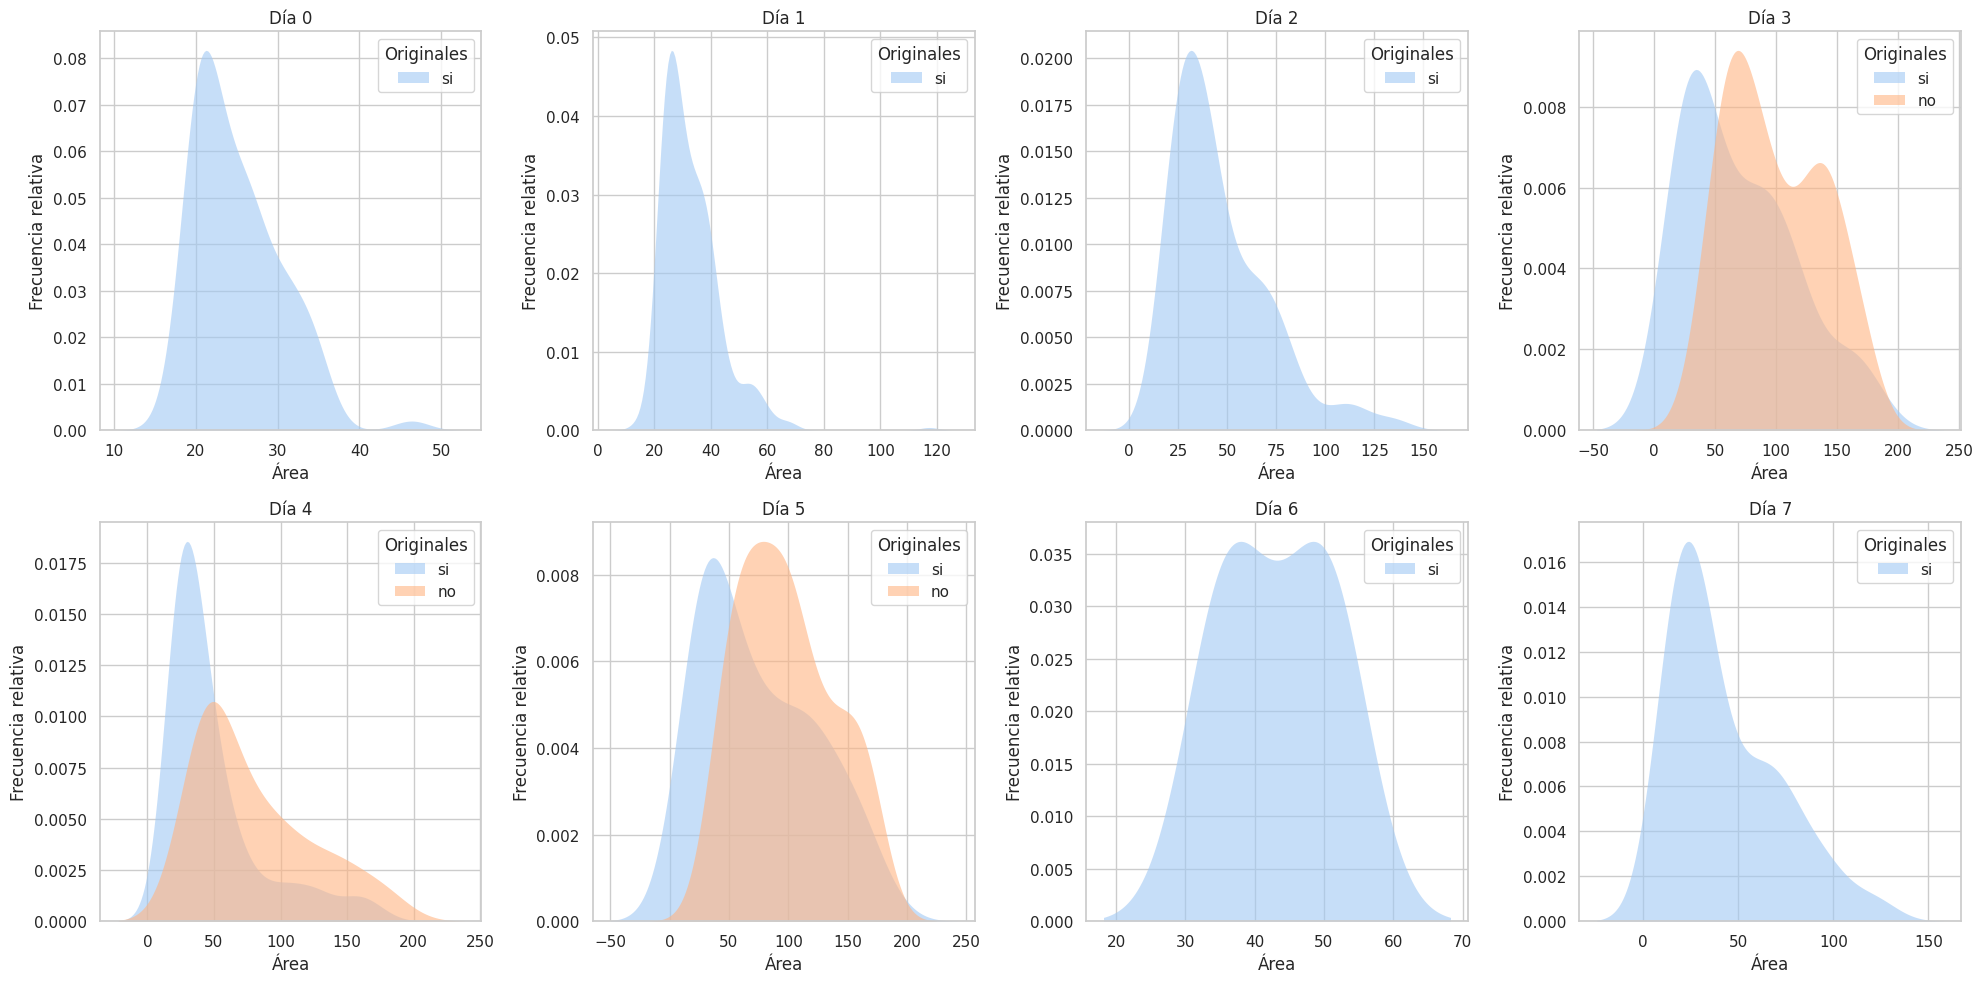

In [38]:
sns.set_theme(style="whitegrid", palette="pastel")
df = all_df.copy()
originales = df['originales'].unique()
dias = df['dia'].unique()
col_ch = "Diameter"

fig, axs = plt.subplots(2, 4, figsize=(20, 10)) # Change the figsize values as needed
axs = axs.ravel()

for j, dia in enumerate(dias):
    for i, original in enumerate(originales):
        subset = df.loc[(df['originales'] == original) & (df['dia'] == dia)]

        # We plot the distributions
        sns.kdeplot(data=subset, x=col_ch, fill=True, common_norm=False,
                    palette="crest", alpha=.6, linewidth=0, label=original, ax=axs[j])

    axs[j].set_xlabel('Área')
    axs[j].set_ylabel('Frecuencia relativa')
    axs[j].legend(title='Originales')
    axs[j].set_title(f'Día {dia}')

plt.tight_layout()
plt.show()


Acá vemos la distribucion de las etiquetas si y no en los distintos días con el dataset original y con los nuevos datos:



In [39]:
# datos originales
df = fiji_datos.copy()
df_cross = pd.crosstab(df['dia'], df['Esferoide'])

df_porcentaje = np.round(pd.crosstab(df['dia'], df['Esferoide'], normalize = 'index'),2)
df_porcentaje.rename(columns={'no':'no_%', 'si':'si_%'}, inplace = True)
df_porcentaje['si_%'] = df_porcentaje['si_%'].map('{:.0%}'.format)
df_porcentaje['no_%'] = df_porcentaje['no_%'].map('{:.0%}'.format)

df_dia_esferoide = pd.merge(df_cross, df_porcentaje, on=['dia'], how = 'left')
df_dia_esferoide

Esferoide,no,si,no_%,si_%
dia,,,,
0,20,74,21%,79%
1,89,253,26%,74%
2,85,70,55%,45%
3,25,18,58%,42%
4,206,48,81%,19%
5,24,28,46%,54%
6,2,2,50%,50%
7,45,29,61%,39%


In [40]:
# sumando datos sintéticos
df = all_df.copy()
df_cross = pd.crosstab(all_df['dia'], all_df['Esferoide'])

df_porcentaje = np.round(pd.crosstab(df['dia'], df['Esferoide'], normalize = 'index'),2)
df_porcentaje.rename(columns={'no':'no_%', 'si':'si_%'}, inplace = True)
df_porcentaje['si_%'] = df_porcentaje['si_%'].map('{:.0%}'.format)
df_porcentaje['no_%'] = df_porcentaje['no_%'].map('{:.0%}'.format)

df_dia_esferoide = pd.merge(df_cross, df_porcentaje, on=['dia'], how = 'left')
df_dia_esferoide

Esferoide,no,si,no_%,si_%
dia,,,,
0,20,74,21%,79%
1,89,253,26%,74%
2,85,70,55%,45%
3,25,120,17%,83%
4,206,98,68%,32%
5,24,115,17%,83%
6,2,2,50%,50%
7,45,29,61%,39%
